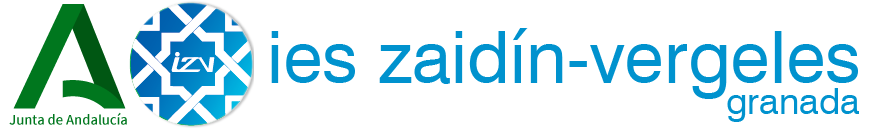



# **Instalación y configuración de Spark**

In [ ]:
#Descarga de Spark y Hadoop
!wget https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

--2024-03-19 17:59:58--  https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400395283 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.0-bin-hadoop3.tgz’

spark-3.5.0-bin-had 100%[===================>] 381.85M  6.72MB/s    in 27s     

2024-03-19 18:00:26 (14.2 MB/s) - ‘spark-3.5.0-bin-hadoop3.tgz’ saved [400395283/400395283]



In [ ]:
!tar -xzf spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Variables de Entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
#Instalación de PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=af0ed1d422525e7355c282fbf09e5627016709c030cc6fb7434145a2b04de022
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


## **Pregunta 1** Crear una sesión pyspark.sql con soporte Hive.

In [ ]:
from pyspark.sql import SparkSession

# Crear una instancia de SparkSession
spark = SparkSession.builder \
    .appName("BDATarea03") \
    .config("spark.sql.warehouse.dir", "/user/hive/warehouse") \
    .enableHiveSupport() \
    .getOrCreate()

# Verificar que la sesión tenga soporte para Hive
spark.sql("SHOW TABLES").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



## **Pregunta 2** Crear un DataFrame con el archivo plantilla2122.csv. Crear un DataFrame con el archivo plantilla2223.csv. Cuenta el número de filas de cada uno de los DataFrame. Debes obtener 35.504 para el curso 21/22 y 35.656 para el curso 22/23.


In [ ]:
# Creamos un dataframe a partir del archivo plantilla2122 CSV
df1=spark.read.option("delimiter", ",").option("inferSchema",True).option("header", True).csv("plantilla2122.csv")

In [ ]:
# Creamos un dataframe a partir del archivo plantilla2223 CSV
df2=spark.read.option("delimiter", ",").option("inferSchema",True).option("header", True).csv("plantilla2223.csv")

In [ ]:
# Contar el número de filas de df1
count_df1 = df1.count()

# Contar el número de filas de df2
count_df2 = df2.count()

# Imprimir el resultado
print("Número de filas en df1:", count_df1)
print("Número de filas en df2:", count_df2)

Número de filas en df1: 35504
Número de filas en df2: 35656


## **Pregunta 3** Mediante instrucciones  SELECT, obtén un nuevo DataFrame que contenga las provincias, el número de plazas del curso 21-22 por provincia, el número de plazas del curso 22-23 por provincia y la diferencia de plazas entre ambos cursos, ordenado por provincia.


In [ ]:
# Ver los campos del dataframe 1
df1.dtypes

[('CUERPO', 'string'),
 ('PROVINCIA', 'string'),
 ('LOCALIDAD', 'string'),
 ('CENTRO', 'string'),
 ('PUESTO', 'string'),
 ('PLANTILLA', 'int')]

In [ ]:
## Ver los campos del dataframe 1
df2.dtypes

[('_c0', 'int'),
 ('CUERPO', 'string'),
 ('PROVINCIA', 'string'),
 ('LOCALIDAD', 'string'),
 ('CENTRO', 'string'),
 ('PUESTO', 'string'),
 ('PLAZAS', 'int')]

In [ ]:
# Cambiar el nombre de la columna
df1 = df1.withColumnRenamed("PLANTILLA", "PLAZAS")

# Mostrar el DataFrame con el nuevo nombre de columna
df1.show()

+--------+---------+---------+--------------------+--------------------+------+
|  CUERPO|PROVINCIA|LOCALIDAD|              CENTRO|              PUESTO|PLAZAS|
+--------+---------+---------+--------------------+--------------------+------+
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597031-EDUCACIÓ...|     2|
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597032-LENGUA E...|     1|
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597033-LENGUA E...|     1|
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597034-EDUCACIÓ...|     1|
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597035-MÚSICA (...|     1|
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597036-PEDAGOGÍ...|     1|
|MAESTROS|  ALMERÍA|     ABLA|04000018-C.E.I.P....|00597038-EDUCACIÓ...|     3|
|MAESTROS|  ALMERÍA| ABRUCENA|04000021-C.E.I.P....|00597031-EDUCACIÓ...|     2|
|MAESTROS|  ALMERÍA| ABRUCENA|04000021-C.E.I.P....|00597032-LENGUA E...|     1|
|MAESTROS|  ALMERÍA| ABRUCENA|04000021-C

In [ ]:
df1=df1.select('PROVINCIA','PLAZAS')
df2=df2.select('PROVINCIA','PLAZAS')

In [ ]:
# Registrar los DataFrames como tablas temporales para poder referenciarlos en la consulta SQL
df1.createOrReplaceTempView("plazas_21_22")
df2.createOrReplaceTempView("plazas_22_23")

### Con Instruccciones de Spark

In [ ]:
# Realizar la consulta con instrucciones select
df_resultado1 = df1.select("provincia", "plazas") \
                 .groupBy("provincia") \
                 .sum("plazas") \
                 .withColumnRenamed("sum(plazas)", "plazas_21_22") \
                 .orderBy("provincia")

# Mostrar el resultado
df_resultado1.show()

+---------+------------+
|provincia|plazas_21_22|
+---------+------------+
|  ALMERÍA|        7780|
|    CÁDIZ|       12086|
|  CÓRDOBA|        7665|
|  GRANADA|        8830|
|   HUELVA|        5573|
|     JAÉN|        6454|
|   MÁLAGA|       14313|
|  SEVILLA|       18188|
+---------+------------+



In [ ]:
# Realizar la consulta con instrucciones select
df_resultado2 = df2.select("provincia", "plazas") \
                 .groupBy("provincia") \
                 .sum("plazas") \
                 .withColumnRenamed("sum(plazas)", "plazas_22_23") \
                 .orderBy("provincia")

# Mostrar el resultado
df_resultado2.show()

+---------+------------+
|provincia|plazas_22_23|
+---------+------------+
|  ALMERÍA|        7904|
|    CÁDIZ|       12046|
|  CÓRDOBA|        7678|
|  GRANADA|        8888|
|   HUELVA|        5664|
|     JAÉN|        6469|
|   MÁLAGA|       14583|
|  SEVILLA|       18433|
+---------+------------+



In [ ]:
from pyspark.sql.functions import col

# Realizar un join entre los dos DataFrames por la columna "provincia"
df_join = df_resultado1.join(df_resultado2, "provincia", "inner")

# Calcular la diferencia entre las plazas de ambos DataFrames
df_diferencia = df_join.withColumn("diferencia_plazas", col("plazas_21_22") - col("plazas_22_23")) \
                       .select("provincia", "plazas_21_22", "plazas_22_23", "diferencia_plazas") \
                       .orderBy("provincia")

# Mostrar el resultado
df_diferencia.show()

+---------+------------+------------+-----------------+
|provincia|plazas_21_22|plazas_22_23|diferencia_plazas|
+---------+------------+------------+-----------------+
|  ALMERÍA|        7780|        7904|             -124|
|    CÁDIZ|       12086|       12046|               40|
|  CÓRDOBA|        7665|        7678|              -13|
|  GRANADA|        8830|        8888|              -58|
|   HUELVA|        5573|        5664|              -91|
|     JAÉN|        6454|        6469|              -15|
|   MÁLAGA|       14313|       14583|             -270|
|  SEVILLA|       18188|       18433|             -245|
+---------+------------+------------+-----------------+



### Con sentencia SQL

In [ ]:
# Consulta SQL para obtener las plazas por provincia
query = """
    SELECT
        p21.provincia,
        plazas_21_22,
        plazas_22_23,
        plazas_21_22 - plazas_22_23 AS diferencia_plazas
    FROM (
        SELECT
            p21.provincia,
            SUM(p21.plazas) AS plazas_21_22
        FROM
            plazas_21_22 p21
        GROUP BY
            p21.provincia
    ) p21
    JOIN (
        SELECT
            p22.provincia,
            SUM(p22.plazas) AS plazas_22_23
        FROM
            plazas_22_23 p22
        GROUP BY
            p22.provincia
    ) p22
    ON
        p21.provincia = p22.provincia
    ORDER BY
        p21.provincia
"""

In [ ]:
# Ejecutar la consulta y crear un nuevo DataFrame
df_resultado = spark.sql(query)

In [ ]:
# Mostrar el resultado
df_resultado.show()

+---------+------------+------------+-----------------+
|provincia|plazas_21_22|plazas_22_23|diferencia_plazas|
+---------+------------+------------+-----------------+
|  ALMERÍA|        7780|        7904|             -124|
|    CÁDIZ|       12086|       12046|               40|
|  CÓRDOBA|        7665|        7678|              -13|
|  GRANADA|        8830|        8888|              -58|
|   HUELVA|        5573|        5664|              -91|
|     JAÉN|        6454|        6469|              -15|
|   MÁLAGA|       14313|       14583|             -270|
|  SEVILLA|       18188|       18433|             -245|
+---------+------------+------------+-----------------+



### Muestra una gráfica de barras apiladas con las plazas de ambos cursos por provincia.


In [ ]:
import matplotlib.pyplot as plt

#Dataframe
df_grafica = df_diferencia.select('provincia', 'plazas_21_22', 'plazas_22_23')

#Muestra el DataFrame
df_grafica.show()





+---------+------------+------------+
|provincia|plazas_21_22|plazas_22_23|
+---------+------------+------------+
|  ALMERÍA|        7780|        7904|
|    CÁDIZ|       12086|       12046|
|  CÓRDOBA|        7665|        7678|
|  GRANADA|        8830|        8888|
|   HUELVA|        5573|        5664|
|     JAÉN|        6454|        6469|
|   MÁLAGA|       14313|       14583|
|  SEVILLA|       18188|       18433|
+---------+------------+------------+



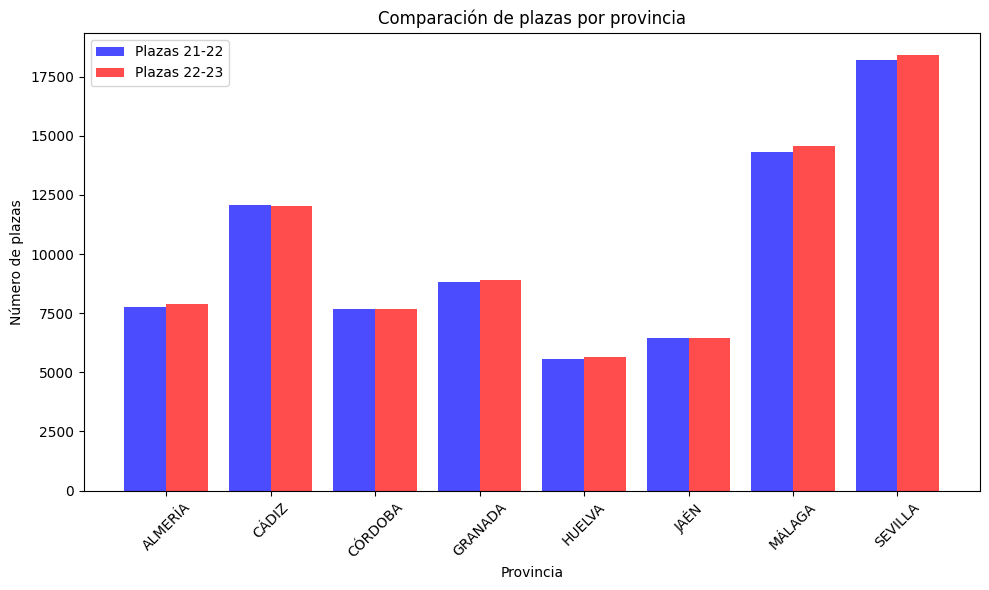

In [ ]:
# Convertir las columnas del DataFrame de Spark en listas de Python
provincias = [row['provincia'] for row in df_grafica.collect()]
plazas_21_22 = [row['plazas_21_22'] for row in df_grafica.collect()]
plazas_22_23 = [row['plazas_22_23'] for row in df_grafica.collect()]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar([x - 0.2 for x in range(len(provincias))], plazas_21_22, color='b', width=0.4, alpha=0.7, label='Plazas 21-22')
plt.bar([x + 0.2 for x in range(len(provincias))], plazas_22_23, color='r', width=0.4, alpha=0.7, label='Plazas 22-23')
plt.xlabel('Provincia')
plt.ylabel('Número de plazas')
plt.title('Comparación de plazas por provincia')
plt.legend()
plt.xticks([x for x in range(len(provincias))], provincias, rotation=45)
plt.tight_layout()
plt.show()

### Otra Gráfica

In [ ]:
from pyspark.sql.functions import sum

# Realizar la consulta con instrucciones select
df_resultado1 = df1.select(sum("plazas").alias("plazas_21_22"))
df_resultado2 = df2.select(sum("plazas").alias("plazas_22_23"))

# Mostrar el resultado
df_resultado1.show()
df_resultado2.show()

+------------+
|plazas_21_22|
+------------+
|       80889|
+------------+

+------------+
|plazas_22_23|
+------------+
|       81665|
+------------+



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que df_resultado1 y df_resultado2 son DataFrames de PySpark
# Convertir los DataFrames de PySpark a pandas DataFrames
df_resultado1_pd = df_resultado1.toPandas()
df_resultado2_pd = df_resultado2.toPandas()

# Unir los DataFrames pandas en uno solo usando merge
df_merged = pd.merge(df_resultado1_pd, df_resultado2_pd, left_index=True, right_index=True)

df_merged

#Transponer
df_merged_transposed = df_merged.transpose()

df_plazas = df_merged_transposed.rename(columns={0: 'Plazas'})

df_plazas



,Plazas
plazas_21_22,80889
plazas_22_23,81665


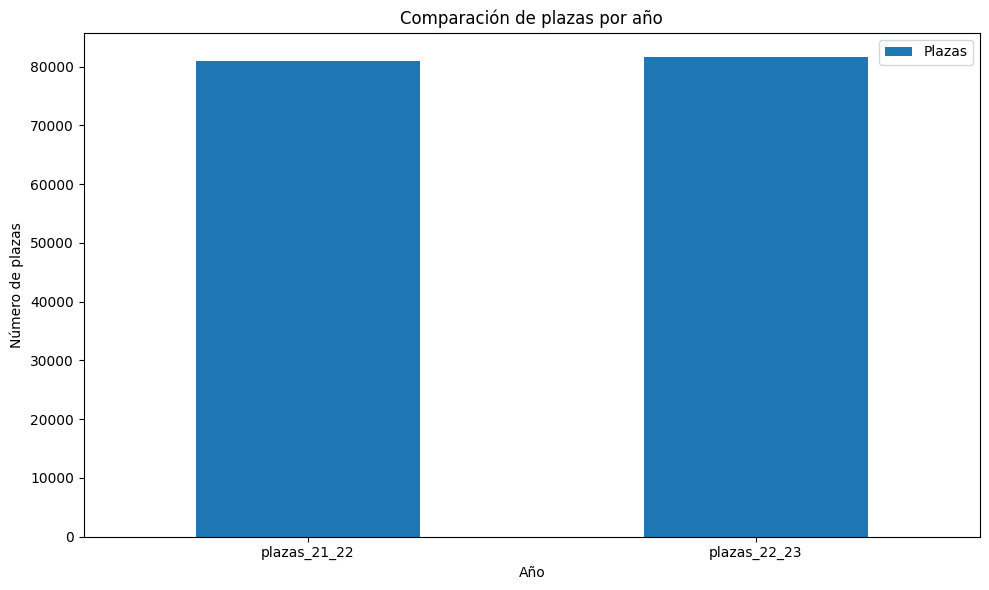

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df_plazas.plot(kind='bar', ax=plt.gca())
plt.xlabel('Períodos')
plt.ylabel('Número de plazas')
plt.title('Comparación de plazas por año')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Guarda en Hive el DataFrame creado en la pregunta 3.


In [ ]:
df1.write.mode("overwrite").saveAsTable("plazas_21_22_hive")

In [ ]:
df2.write.mode("overwrite").saveAsTable("plazas_22_23_hive")

In [ ]:
spark.conf.get("spark.sql.warehouse.dir")

'file:/user/hive/warehouse'